<a href="https://colab.research.google.com/github/ajit421/COVID-19_Data_Analysis/blob/main/COVID_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
# import liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Question 1: Data Loading

In [390]:
# load all csv file
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv')
deaths_df = pd.read_csv('covid_19_deaths_v1.csv')
recovered_df = pd.read_csv('covid_19_recovered_v1.csv')

Q1.1: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?

In [391]:
print("Confirmed Cases:")
print(confirmed_df.head())

print("\nDeaths:")
print(deaths_df.head())

print("\nRecovered Cases:")
print(recovered_df.head())


Confirmed Cases:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
0        0        0        0        0  ...    64575    65080    65486   
1        0        0        0        0  ...   132118   132153   132176   
2        0        0        0        0  ...   126156   126434   126651   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31661    31909    32149   

   5/23/21  5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
0    65728    66275    66903    

**Question 2: Data Exploration**

Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?

In [392]:
def analyze_dataset_structure(file_path, name):
    df = pd.read_csv(file_path)
    print(f"{'=' * 40}\n{name} Dataset Info\n{'=' * 40}")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\nFirst Few Rows:")
    print(df.head())
    print("\nColumn Names and Data Types:")
    print(df.dtypes)
    print("\nMissing Values per Column:")
    print(df.isnull().sum())

# Analyze each dataset
analyze_dataset_structure('covid_19_confirmed_v1.csv', 'Confirmed Cases')
analyze_dataset_structure('covid_19_deaths_v1.csv', 'Deaths')
analyze_dataset_structure('covid_19_recovered_v1.csv', 'Recovered Cases')

Confirmed Cases Dataset Info
Rows: 276, Columns: 498

First Few Rows:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
0        0        0        0        0  ...    64575    65080    65486   
1        0        0        0        0  ...   132118   132153   132176   
2        0        0        0        0  ...   126156   126434   126651   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31661    31909    32149   

   5/23/21  5/24/21  5/25/21  5/26/21  5/27/21

Q2.2: Generate plots of confirmed cases over time for the top countries.

<ipython-input-393-41caf0454cf9>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_melted['Date'] = pd.to_datetime(confirmed_melted['Date'])


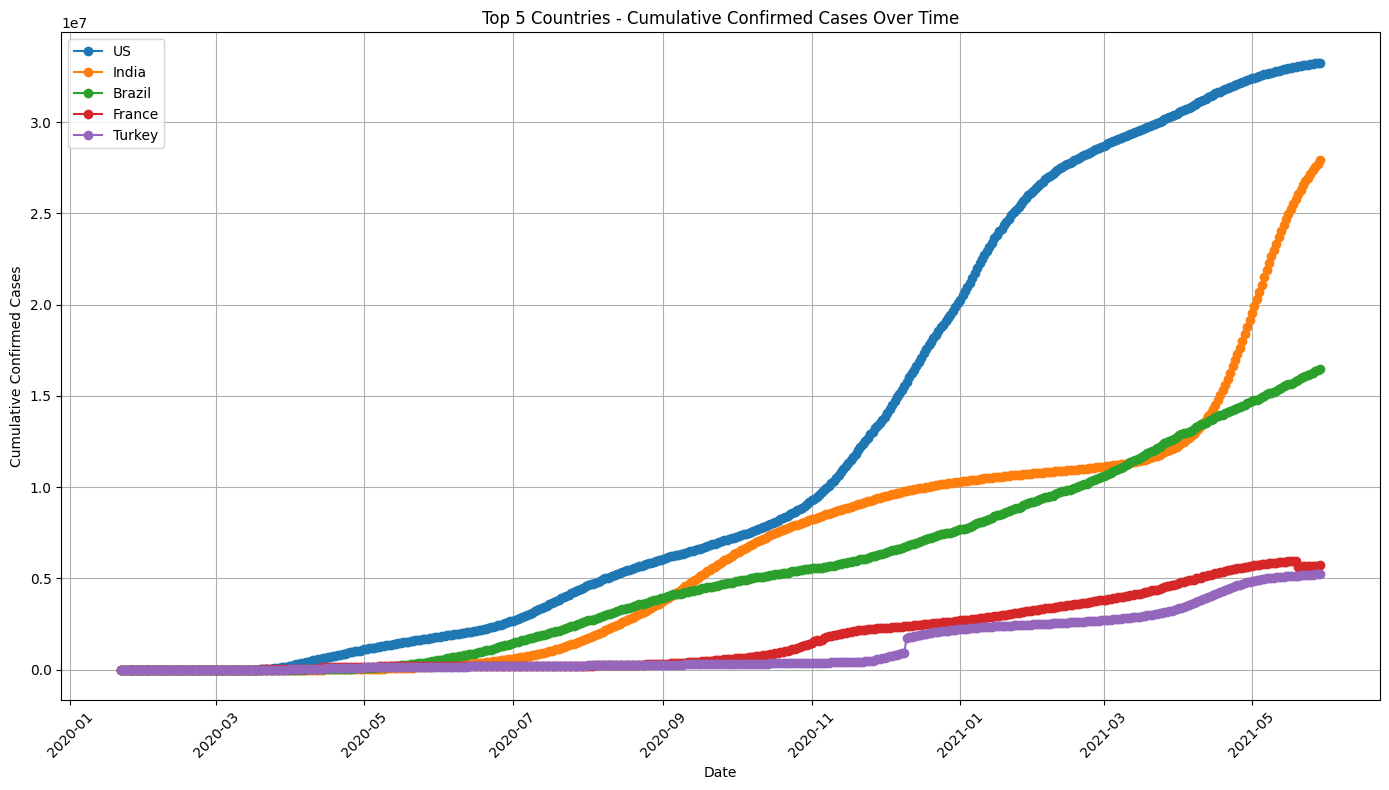

In [393]:
# Load confirmed cases dataset
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv')

# Drop irrelevant columns
confirmed = confirmed_df.drop(['Lat', 'Long'], axis=1)

# Aggregate by country
confirmed_country = confirmed.groupby('Country/Region').sum().reset_index()

# Melt into long format
date_cols = confirmed.columns[2:]
confirmed_melted = confirmed_country.melt(
    id_vars=['Country/Region'],
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

# Convert Date column to datetime
confirmed_melted['Date'] = pd.to_datetime(confirmed_melted['Date'])

# Identify top 5 countries by latest date
latest_date = confirmed_melted['Date'].max()
top_countries = confirmed_melted[confirmed_melted['Date'] == latest_date] \
                   .sort_values(by='Confirmed', ascending=False).head(5)['Country/Region'].tolist()

# Filter data for top countries
top_confirmed = confirmed_melted[confirmed_melted['Country/Region'].isin(top_countries)]

# Plotting
plt.figure(figsize=(14, 8))
for country in top_countries:
    country_data = top_confirmed[top_confirmed['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country, marker='o', linestyle='-')

plt.title("Top 5 Countries - Cumulative Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q2.3: Generate plots of confirmed cases over time for China.

<ipython-input-394-064f4e6ecc64>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_melted['Date'] = pd.to_datetime(confirmed_melted['Date'])


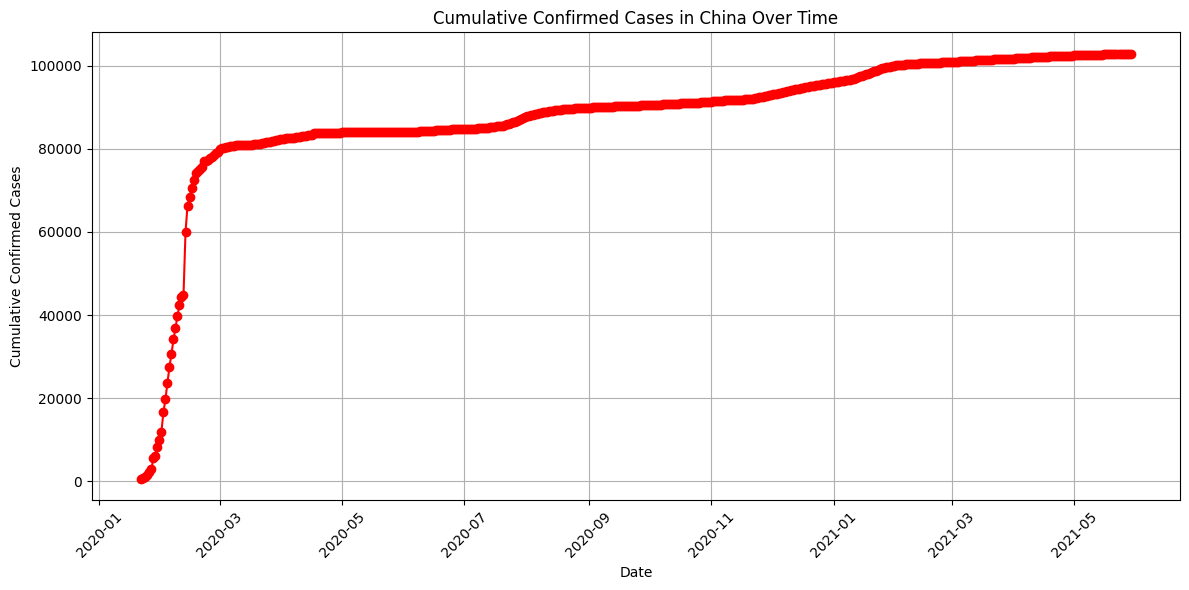

In [394]:

# Drop irrelevant columns
confirmed = confirmed_df.drop(['Lat', 'Long'], axis=1)

# Aggregate by country
confirmed_country = confirmed.groupby('Country/Region').sum().reset_index()

# Melt into long format
date_cols = confirmed.columns[2:]
confirmed_melted = confirmed_country.melt(
    id_vars=['Country/Region'],
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

# Convert Date column to datetime
confirmed_melted['Date'] = pd.to_datetime(confirmed_melted['Date'])

# Filter for China
china_data = confirmed_melted[confirmed_melted['Country/Region'] == 'China']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(china_data['Date'], china_data['Confirmed'], color='red', marker='o', linestyle='-')
plt.title("Cumulative Confirmed Cases in China Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 3: Handling Missing Data

Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

In [395]:
# Display basic information about missing values
print("Initial Missing Values:\n", confirmed_df.isnull().sum())


# Exclude metadata columns
date_cols = confirmed_df.columns[4:]  # Assuming the first 4 columns are metadata

# Set metadata as the index to focus on time-series data
confirmed_filled = confirmed_df.set_index(['Province/State', 'Country/Region', 'Lat', 'Long'])

# Apply forward fill along the time-series axis (column-wise)
confirmed_filled = confirmed_filled.fillna(method='ffill', axis=1)

# Reset the index to restore the original DataFrame structure
confirmed_filled = confirmed_filled.reset_index()

# Check for remaining missing values
print("\nRemaining Missing Values After Forward Fill:\n", confirmed_filled.isnull().sum())

# Replace any remaining NaNs with 0
confirmed_filled[date_cols] = confirmed_filled[date_cols].fillna(0)




Initial Missing Values:
 Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

Remaining Missing Values After Forward Fill:
 Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64


<ipython-input-395-40fb3155eae7>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  confirmed_filled = confirmed_filled.fillna(method='ffill', axis=1)


Question 4: Data Cleaning and Preparation


Q4.1: Replace blank values in the province column with “All Provinces.”

In [396]:
# Load the dataset
df = pd.read_csv('covid_19_confirmed_v1.csv')

# Count the number of missing values
missing_values = df['Province/State'].isnull().sum()
print(f"Number of missing values in 'Province/State': {missing_values}")

# Replace empty strings and missing values with "All Provinces"
df['Province/State'] = df['Province/State'].replace('', 'All Provinces').fillna('All Provinces')

# Check the first few rows to confirm the changes
print("Sample of 'Province/State' column after cleaning:")
print(df[['Province/State', 'Country/Region']].head(10))

# Confirm that there are no remaining missing values
remaining_missing = df['Province/State'].isnull().sum()
print(f"\nRemaining missing values after replacement: {remaining_missing}")

Number of missing values in 'Province/State': 190
Sample of 'Province/State' column after cleaning:
                 Province/State       Country/Region
0                 All Provinces          Afghanistan
1                 All Provinces              Albania
2                 All Provinces              Algeria
3                 All Provinces              Andorra
4                 All Provinces               Angola
5                 All Provinces  Antigua and Barbuda
6                 All Provinces            Argentina
7                 All Provinces              Armenia
8  Australian Capital Territory            Australia
9               New South Wales            Australia

Remaining missing values after replacement: 0


Question 5: Independent Dataset Analysis

Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

In [397]:
# Select the relevant countries and drop unnecessary columns
countries = ['Germany', 'France', 'Italy']
confirmed_countries = confirmed_filled[confirmed_filled['Country/Region'].isin(countries)].drop(columns=['Province/State', 'Lat', 'Long'])

# Group by country and sum up cases across different provinces/states within each country
confirmed_countries_agg = confirmed_countries.groupby('Country/Region').sum()

# Transpose the DataFrame so dates are rows and countries are columns
confirmed_countries_agg_T = confirmed_countries_agg.T

# Calculate daily new cases
daily_new_cases = confirmed_countries_agg_T.diff().fillna(0)

# Convert column names to datetime objects for easier handling
daily_new_cases.index = pd.to_datetime(daily_new_cases.index)

# Find the peak daily new cases for each country
peak_cases = daily_new_cases.max()
peak_dates = daily_new_cases.idxmax()

print("Peak daily new cases and dates for Germany, France, and Italy:")
for country in countries:
    print(f"{country}: Peak Cases = {int(peak_cases[country])}, Date = {peak_dates[country].strftime('%Y-%m-%d')}")

# Find the country with the highest single-day surge
highest_surge_country = peak_cases.idxmax()
highest_surge_cases = peak_cases.max()
highest_surge_date = peak_dates[highest_surge_country]

print(f"\nCountry with the highest single-day surge: {highest_surge_country}")
print(f"Highest surge cases: {int(highest_surge_cases)}")
print(f"Date of highest surge: {highest_surge_date.strftime('%Y-%m-%d')}")

Peak daily new cases and dates for Germany, France, and Italy:
Germany: Peak Cases = 49044, Date = 2020-12-30
France: Peak Cases = 117900, Date = 2021-04-11
Italy: Peak Cases = 40902, Date = 2020-11-13

Country with the highest single-day surge: France
Highest surge cases: 117900
Date of highest surge: 2021-04-11


<ipython-input-397-ee07e75aa952>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_new_cases.index = pd.to_datetime(daily_new_cases.index)


Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric

In [398]:
# Load the dataset
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv')

# Print the column names
print("Columns in the DataFrame:")
print(confirmed_df.columns.tolist())

# Find the country column dynamically
country_col = [col for col in confirmed_df.columns if 'country' in col.lower()]
if country_col:
    confirmed_df = confirmed_df.rename(columns={country_col[0]: 'Country/Region'})
else:
    print("No country column found.")

# Check if 'Country/Region' still exists after preprocessing
if 'Country/Region' not in confirmed_df.columns:
    print("Error: 'Country/Region' column is missing.")
else:
    print("'Country/Region' column exists.")


# Load the dataset
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv')

# Inspect columns
print("Columns:", confirmed_df.columns.tolist())

# Drop unnecessary columns
confirmed_df = confirmed_df.drop(['Lat', 'Long'], axis=1)

# Identify date columns
date_cols = confirmed_df.columns[2:]

# Group by 'Country/Region'
confirmed_country = confirmed_df.groupby('Country/Region')[date_cols].sum().reset_index()

# Melt into long format
melted = confirmed_country.melt(
    id_vars='Country/Region',
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

# Convert Date to datetime
melted['Date'] = pd.to_datetime(melted['Date'])

# Compute daily new cases
melted['Daily_New_Cases'] = melted.groupby('Country/Region')['Confirmed'].diff().fillna(0).astype(int)

# Pivot back to wide format
pivoted = melted.pivot(index='Date', columns='Country/Region', values='Daily_New_Cases').fillna(0)

# Display the result
print(pivoted.tail())

Columns in the DataFrame:
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/

<ipython-input-398-0d5148e91ca8>:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted['Date'] = pd.to_datetime(melted['Date'])


Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [399]:
# Load the dataset
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv')

# Display the first few rows and column names
print("First few rows of data:")
print(confirmed_df.head())

print("\nColumns in the dataset:")
print(confirmed_df.columns.tolist())

# Example: Using 'Country/Region' if it exists
country_col = 'Country/Region' if 'Country/Region' in confirmed_df.columns else 'Country'

# Or directly use the correct column name
confirmed_country = confirmed_df.groupby(country_col)[date_cols].sum().reset_index()

country_col = confirmed_df.get('Country/Region')
if country_col is None:
    print("Column 'Country/Region' not found.")
else:
    print("Found 'Country/Region'")

for col in confirmed_df.columns:
    if 'country' in col.lower():
        print(f"Possible country column: {col}")

import pandas as pd

# Load dataset
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv')

# Display column names and sample data
print("Columns:", confirmed_df.columns.tolist())
print(confirmed_df.head())

# Determine the correct country column
country_col = 'Country/Region' if 'Country/Region' in confirmed_df.columns else 'Country'

# Drop unnecessary columns
confirmed = confirmed_df.drop(['Lat', 'Long'], axis=1, errors='ignore')

# Identify date columns
date_cols = confirmed.columns[2:]

# Group by country
confirmed_country = confirmed.groupby(country_col)[date_cols].sum().reset_index()

# Melt into long format
melted = confirmed_country.melt(
    id_vars=country_col,
    value_vars=date_cols,
    var_name='Date',
    value_name='Confirmed'
)

# Convert Date to datetime
melted['Date'] = pd.to_datetime(melted['Date'])

# Output result
print(melted.head())


First few rows of data:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
0        0        0        0        0  ...    64575    65080    65486   
1        0        0        0        0  ...   132118   132153   132176   
2        0        0        0        0  ...   126156   126434   126651   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31661    31909    32149   

   5/23/21  5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
0    65728    66275    66

<ipython-input-399-3eda0971327f>:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted['Date'] = pd.to_datetime(melted['Date'])


Columns: ['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20'

Question 6: Data Transformation

Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?

In [400]:
# Define the column names
column_names = [
    'Province/State', 'Country/Region', 'Lat', 'Long'
] + [f"{m}/{d}/{y}" for y in [20, 21] for m in range(1, 13) for d in range(1, 32)
     if (y == 20 or (y == 21 and m <= 5)) and
        not ((m == 2 and d > 29) or (m in [4,6,9,11] and d > 30))]

# Limit to 498 columns (as per your output)
column_names = column_names[:498]

# Load the dataset with custom column names
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=column_names)

# Display the first few rows and columns
print("First 2 Rows of Data:")
print(deaths_df.head(2))
print("\nColumns in the dataset:")
print(deaths_df.columns.tolist())

# Drop unnecessary columns (Lat and Long)
deaths = deaths_df.drop(['Lat', 'Long'], axis=1)

# Identify date columns (skip first two columns)
date_columns = deaths.columns[2:]

# Melt the dataset into long format
deaths_long = deaths.melt(
    id_vars=['Province/State', 'Country/Region'],
    value_vars=date_columns,
    var_name='Date',
    value_name='Deaths'
)

# Convert Date to datetime
# deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])

# Display the transformed dataset
print("\nTransformed Dataset (First 5 Rows):")
print(deaths_long.head())
# Group by country and get the latest death count
total_deaths_per_country = deaths_long.groupby('Country/Region').agg({
    'Deaths': 'last'
}).reset_index()

# Sort by total deaths in descending order
total_deaths_per_country = total_deaths_per_country.sort_values(by='Deaths', ascending=False)

# Display the top 10 countries by total deaths
print("\nTop 10 Countries by Total Deaths:")
print(total_deaths_per_country.head(10))





First 2 Rows of Data:
   Province/State  Country/Region      Lat     Long   1/1/20   1/2/20  \
0         Column1         Column2  Column3  Column4  Column5  Column6   
1  Province/State  Country/Region      Lat     Long  1/22/20  1/23/20   

    1/3/20   1/4/20   1/5/20    1/6/20  ...    4/28/21    4/29/21    4/30/21  \
0  Column7  Column8  Column9  Column10  ...  Column489  Column490  Column491   
1  1/24/20  1/25/20  1/26/20   1/27/20  ...    5/20/21    5/21/21    5/22/21   

      5/1/21     5/2/21     5/3/21     5/4/21     5/5/21     5/6/21     5/7/21  
0  Column492  Column493  Column494  Column495  Column496  Column497  Column498  
1    5/23/21    5/24/21    5/25/21    5/26/21    5/27/21    5/28/21    5/29/21  

[2 rows x 498 columns]

Columns in the dataset:
['Province/State', 'Country/Region', 'Lat', 'Long', '1/1/20', '1/2/20', '1/3/20', '1/4/20', '1/5/20', '1/6/20', '1/7/20', '1/8/20', '1/9/20', '1/10/20', '1/11/20', '1/12/20', '1/13/20', '1/14/20', '1/15/20', '1/16/20', '1/17/

Q6.2: What is the total number of deaths reported per country up to the current date?

In [401]:
# Get the latest date in the dataset
latest_date = deaths_long['Date'].max()

# Filter the dataset for the latest date
latest_deaths = deaths_long[deaths_long['Date'] == latest_date]

# Group by country and calculate the total deaths
total_deaths_per_country = latest_deaths.groupby('Country/Region')['Deaths'].sum().reset_index()

# Sort the result in descending order of total deaths
total_deaths_per_country = total_deaths_per_country.sort_values(by='Deaths', ascending=False)

# Display the top 10 countries
print("\nTop 10 Countries by Total Deaths (as of", latest_date, "):")
print(total_deaths_per_country.head(10))


Top 10 Countries by Total Deaths (as of 9/9/20 ):
     Country/Region     Deaths
38          Column2  Column257
162         Somalia         99
81            India      98678
11          Bahamas         96
7           Armenia        959
68          Germany       9495
134            Oman        935
84             Iraq       9181
42       Costa Rica        904
44   Country/Region    9/30/20


Q6.3: What are the top 5 countries with the highest average daily deaths?

In [402]:
# Define expected column names
columns = [
    'Province/State', 'Country/Region', 'Lat', 'Long'
] + [f"{m}/{d}/{y}" for y in [20, 21] for m in range(1, 13) for d in range(1, 32)
     if (y == 20 or (y == 21 and m <= 5)) and
        not ((m == 2 and d > 29) or (m in [4,6,9,11] and d > 30))]

columns = columns[:498]  # Adjust based on your dataset size

# Load the dataset with proper headers
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=columns)

# Drop irrelevant columns
deaths = deaths_df.drop(['Lat', 'Long'], axis=1)

# Identify date columns
date_cols = deaths.columns[2:]

for col in date_cols:
    deaths[col] = pd.to_numeric(deaths[col], errors='coerce')

deaths[date_cols] = deaths[date_cols].fillna(0).astype(int)

deaths_long = deaths.melt(
    id_vars=['Province/State', 'Country/Region'],
    value_vars=date_cols,
    var_name='Date',
    value_name='Cumulative_Deaths'
)



deaths_long['Daily_New_Deaths'] = (
    deaths_long.groupby('Country/Region')['Cumulative_Deaths']
    .diff()
    .fillna(0)
    .astype(int)
)
print(deaths_long[['Country/Region', 'Date', 'Cumulative_Deaths', 'Daily_New_Deaths']].head())



   Country/Region    Date  Cumulative_Deaths  Daily_New_Deaths
0         Column2  1/1/20                  0                 0
1  Country/Region  1/1/20                  0                 0
2     Afghanistan  1/1/20                  0                 0
3         Albania  1/1/20                  0                 0
4         Algeria  1/1/20                  0                 0


Q6.4: How have the total deaths evolved over time in the United States?

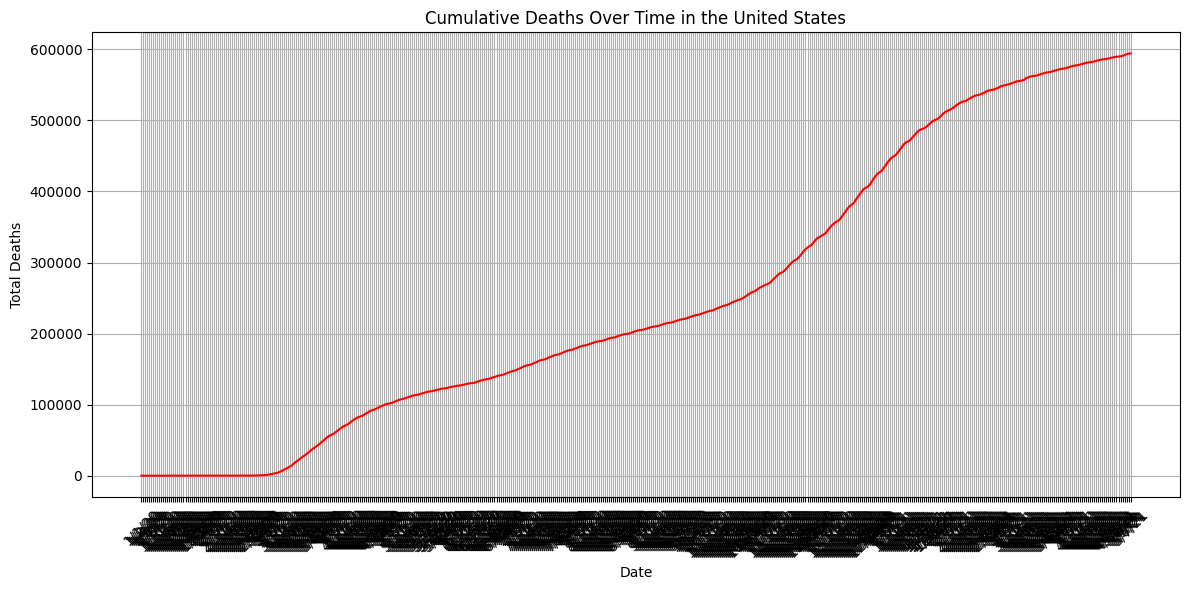

In [403]:
# Define Column Names
columns = [
    'Province/State', 'Country/Region', 'Lat', 'Long'
] + [f"{m}/{d}/{y}" for y in [20, 21] for m in range(1, 13) for d in range(1, 32)
     if (y == 20 or (y == 21 and m <= 5)) and
        not ((m == 2 and d > 29) or (m in [4,6,9,11] and d > 30))]

columns = columns[:498]

# Load Dataset
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=columns)

# Drop Unnecessary Columns
deaths_df = deaths_df.drop(['Lat', 'Long'], axis=1)

# Convert Date Columns to Numeric
date_cols = deaths_df.columns[2:]
deaths_df[date_cols] = deaths_df[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Melt to Long Format
deaths_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region'],
    value_vars=date_cols,
    var_name='Date',
    value_name='Deaths'
)


# Compute Daily Deaths
deaths_long['Daily_Deaths'] = deaths_long.groupby('Country/Region')['Deaths'].diff().fillna(0).astype(int)

# Filter for US Data
us_data = deaths_long[deaths_long['Country/Region'] == 'US']

# Plot Cumulative Deaths Over Time
plt.figure(figsize=(12, 6))
plt.plot(us_data['Date'], us_data['Deaths'], color='red')
plt.title("Cumulative Deaths Over Time in the United States")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Question 7: Data Merging

Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [ ]:
# Helper function to generate date columns
def generate_date_columns():
    date_cols = []
    for year in [20, 21]:  # 2020 and 2021
        for month in range(1, 13):
            if year == 21 and month > 5:
                break  # Stop at May 2021
            for day in range(1, 32):
                if (month == 2 and day > 29) or (month in [4, 6, 9, 11] and day > 30):
                    continue  # Skip invalid dates
                date_cols.append(f"{month}/{day}/{year}")
    return date_cols[:494]  # Total number of date columns

# Define column names
columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns()

# Function to load and transform a dataset
def transform_dataset(file_path, file_type='confirmed'):
    # Load the dataset with custom column names
    df = pd.read_csv(file_path, header=None, names=columns)

    # Convert date columns to numeric
    date_cols = df.columns[4:]
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

    # Melt the DataFrame to long format
    melted = df.melt(
        id_vars=['Province/State', 'Country/Region'],
        value_vars=date_cols,
        var_name='Date',
        value_name=file_type.capitalize()
    )

    # Convert 'Date' to datetime (handle invalid formats gracefully)
    melted['Date'] = pd.to_datetime(melted['Date'], errors='coerce')
    melted.dropna(subset=['Date'], inplace=True)  # Remove rows with invalid dates

    # Drop rows with NaN values in the target column
    melted.dropna(subset=[f'{file_type.capitalize()}'], inplace=True)

    return melted

# Transform each dataset
confirmed_df = transform_dataset('covid_19_confirmed_v1.csv', 'confirmed')
deaths_df = transform_dataset('covid_19_deaths_v1.csv', 'deaths')
recovered_df = transform_dataset('covid_19_recovered_v1.csv', 'recovered')

# Merge the three datasets on 'Country/Region' and 'Date'
merged_df = confirmed_df.merge(deaths_df, on=['Country/Region', 'Date'], how='outer')
merged_df = merged_df.merge(recovered_df, on=['Country/Region', 'Date'], how='outer')

# Fill missing values with 0
merged_df[['Confirmed', 'Deaths', 'Recovered']] = merged_df[['Confirmed', 'Deaths', 'Recovered']].fillna(0).astype(int)

# Add a 'Month' column for easier analysis
merged_df['Month'] = merged_df['Date'].dt.to_period('M')

# Display the first few rows of the merged dataset
print("Merged Dataset (First 5 Rows):")
print(merged_df.head())


# Save to a new CSV
merged_df.to_csv('combined.csv', index=False)

print("Files combined successfully into 'combined.csv'")


Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [ ]:
# Convert Date column to datetime objects
merged['Date'] = pd.to_datetime(merged['Date'])

# Extract month and year for grouping
merged['YearMonth'] = merged['Date'].dt.to_period('M')

# Group by country and YearMonth, and sum the cases
monthly_summary = merged.groupby(['Country', 'YearMonth']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Convert YearMonth back to string or datetime if needed for display/plotting
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)

print("Monthly summary of cases, deaths, and recoveries by country:")
print(monthly_summary.head())

# Example: Plot monthly progression for a specific country (e.g., United States)
country_to_plot = 'US'
us_monthly = monthly_summary[monthly_summary['Country'] == country_to_plot]

if not us_monthly.empty:
    plt.figure(figsize=(15, 7))
    plt.plot(us_monthly['YearMonth'], us_monthly['Confirmed'], label='Confirmed', marker='o')
    plt.plot(us_monthly['YearMonth'], us_monthly['Deaths'], label='Deaths', marker='o')
    plt.plot(us_monthly['YearMonth'], us_monthly['Recovered'], label='Recovered', marker='o')

    plt.title(f'Monthly Progression of COVID-19 Cases in {country_to_plot}')
    plt.xlabel('Month')
    plt.ylabel('Sum of Cases')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Data for {country_to_plot} not found in the merged dataset.")

Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

In [ ]:
# Helper function to generate date columns
def generate_date_columns():
    date_cols = []
    for year in [20, 21]:  # For years 2020 and 2021
        for month in range(1, 13):  # Months 1 to 12
            if year == 21 and month > 5:  # Stop at May 2021
                break
            for day in range(1, 32):  # Days 1 to 31
                if (month == 2 and day > 29) or (month in [4, 6, 9, 11] and day > 30):  # Handle leap year and short months
                    continue
                date_cols.append(f"{month}/{day}/{year}")
    return date_cols[:494]  # Limit to 494 days (from 1/22/20 to 5/29/21)

# Load raw datasets
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv', header=None, names=['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns())
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns())
recovered_df = pd.read_csv('covid_19_recovered_v1.csv', header=None, names=['Province/State', 'Country/Region', 'Lat', 'Long'] + generate_date_columns())

# Function to transform datasets into long format
def transform(df, metric_name):
    df = df[['Country/Region'] + generate_date_columns()].copy()  # Select relevant columns
    date_cols = generate_date_columns()
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)  # Convert date columns to integers
    melted = df.melt(id_vars=['Country/Region'], value_vars=date_cols, var_name='Date', value_name=metric_name)  # Melt into long format
    # melted['Date'] = pd.to_datetime(melted['Date'], format='%m/%d/%y')  # Parse dates
    return melted

# Transform each dataset
confirmed_long = transform(confirmed_df, 'Confirmed')
deaths_long = transform(deaths_df, 'Deaths')
recovered_long = transform(recovered_df, 'Recovered')

# Merge datasets
merged = pd.merge(confirmed_long, deaths_long, on=['Country/Region', 'Date'], how='outer')
merged = pd.merge(merged, recovered_long, on=['Country/Region', 'Date'], how='outer')
merged[['Confirmed', 'Deaths', 'Recovered']] = merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0).astype(int)

# Add Month column
# merged['Month'] = merged['Date'].dt.to_period('M').astype(str)

# Group by Country and Month
# monthly_data = merged.groupby(['Country/Region', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Rename columns for clarity
# monthly_data = monthly_data.rename(columns={'Country/Region': 'Country'})


Question 8: Combined Data Analysis

Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [ ]:
# Load the dataset
merged_df = pd.read_csv('/content/merged_covid_data.csv')

# Filter for 2020 data
merged_2020 = merged_df[merged_df['Date'] < '2021-01-01']

# Aggregate confirmed cases and deaths by country
country_totals = merged_2020.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Calculate death rate
country_totals['Death_Rate'] = country_totals['Deaths'] / country_totals['Confirmed']


top_death_rate_countries = country_totals.sort_values(by='Death_Rate', ascending=False).head(3)



plt.figure(figsize=(10, 6))
plt.bar(top_death_rate_countries['Country/Region'], top_death_rate_countries['Death_Rate'] * 100, color=['red', 'orange', 'blue'])
plt.title("Top 3 Countries by Death Rate (2020)")
plt.ylabel("Death Rate (%)")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [10]:
import pandas as pd

# Helper function to generate date columns
def generate_date_columns():
    date_cols = []
    for y in [20, 21]:  # 2020 and 2021
        for m in range(1, 13):
            if y == 21 and m > 5:  # Stop at June 2021
                break
            for d in range(1, 32):
                if (m == 2 and d > 29) or (m in [4, 6, 9, 11] and d > 30):
                    continue
                date_cols.append(f"{m}/{d}/{y}")
    return date_cols[:494]

# Define columns
date_columns = generate_date_columns()
columns = ['Province/State', 'Country/Region', 'Lat', 'Long'] + date_columns

# Load datasets
confirmed_df = pd.read_csv('covid_19_confirmed_v1.csv', header=None, names=columns)
deaths_df = pd.read_csv('covid_19_deaths_v1.csv', header=None, names=columns)
recovered_df = pd.read_csv('covid_19_recovered_v1.csv', header=None, names=columns)

# Function to transform each dataset
def transform(df, metric_name, date_cols):
    df = df[['Country/Region'] + date_cols].copy()
    df[date_cols] = df[date_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    melted = df.melt(
        id_vars=['Country/Region'],
        value_vars=date_cols,
        var_name='Date',
        value_name=metric_name
    )
    melted['Date'] = pd.to_datetime(melted['Date'], format='%m/%d/%y', errors='coerce')
    return melted

# Transform datasets
confirmed_long = transform(confirmed_df, 'Confirmed', date_columns)
deaths_long = transform(deaths_df, 'Deaths', date_columns)
recovered_long = transform(recovered_df, 'Recovered', date_columns)

# Merge all
merged = confirmed_long.merge(deaths_long, on=['Country/Region', 'Date'], how='outer')
merged = merged.merge(recovered_long, on=['Country/Region', 'Date'], how='outer')

# Fill missing values
merged[['Confirmed', 'Deaths', 'Recovered']] = merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0).astype(int)

# Check result
print(type(merged))
print(merged.head())


<class 'pandas.core.frame.DataFrame'>
  Country/Region       Date  Confirmed  Deaths  Recovered
0    Afghanistan        NaT      56153    2464      49743
1    Afghanistan 2020-01-01          0       0          0
2    Afghanistan 2020-01-02          0       0          0
3    Afghanistan 2020-01-03          0       0          0
4    Afghanistan 2020-01-04          0       0          0


Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [11]:
import pandas as pd

# Filter for United States data between March 2020 and May 2021
us_data = merged[
    (merged['Country/Region'] == 'US') &
    (merged['Date'] >= '2020-03-01') &
    (merged['Date'] <= '2021-05-31')
]

# Add Month column
us_data['Month'] = us_data['Date'].dt.to_period('M').astype(str)

# Group by month and compute cumulative totals
monthly_us = us_data.groupby('Month').agg(
    Total_Confirmed=('Confirmed', 'last'),
    Total_Recovered=('Recovered', 'last')
).reset_index()

# Compute recovery ratio
monthly_us['Recovery_Ratio'] = monthly_us['Total_Recovered'] / monthly_us['Total_Confirmed']
monthly_us['Recovery_Ratio'] = monthly_us['Recovery_Ratio'].replace([float('inf'), float('-inf')], None)  # Handle division by zero

# Find the month with the highest recovery ratio
best_month = monthly_us.loc[monthly_us['Recovery_Ratio'].idxmax()]

# Print results
print("\nUnited States - Monthly Recovery Ratios (Mar 2020 - May 2021):")
print(monthly_us)
print(f"\nMonth with Highest Recovery Ratio: {best_month['Month']} - {best_month['Recovery_Ratio']:.4f}")


United States - Monthly Recovery Ratios (Mar 2020 - May 2021):
      Month  Total_Confirmed  Total_Recovered  Recovery_Ratio
0   2020-03           825429            75204        0.091109
1   2020-04          1587596           298418        0.187968
2   2020-05          2280971           622133        0.272749
3   2020-06          3904066          1182018        0.302766
4   2020-07          5622842          1965056        0.349477
5   2020-08          6862834          2615949        0.381176
6   2020-09          8358864          3323354        0.397584
7   2020-10         12213451          4529700        0.370878
8   2020-11         18153724                0        0.000000
9   2020-12         24711684                0        0.000000
10  2021-01         28174750                0        0.000000
11  2021-02         29821754                0        0.000000
12  2021-03         31929351                0        0.000000
13  2021-04         33104884                0        0.000000
14  20

<ipython-input-11-62077a16f6b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Month'] = us_data['Date'].dt.to_period('M').astype(str)
